In [1]:
%matplotlib inline
from pprint import pprint

import plot
from simulate import simulate_withdrawals
import harvesting
import market
import withdrawal
import metrics

from decimal import Decimal

import itertools
import math
import pandas
import scipy.stats

In [2]:
YEARS = 30

In [3]:
df = pandas.DataFrame(index=range(1, YEARS+1))

In [15]:
MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2017-YEARS):
    r = MARKET.iter_from(i)
    h = harvesting.N_60_RebalanceHarvesting
    w = lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('0.04'))
    results = simulate_withdrawals(r, years=YEARS, harvesting=h, withdraw=w)
    
    balances = [int(n.portfolio_n) for n in results]
    df[i] = balances

In [16]:
t = df.T

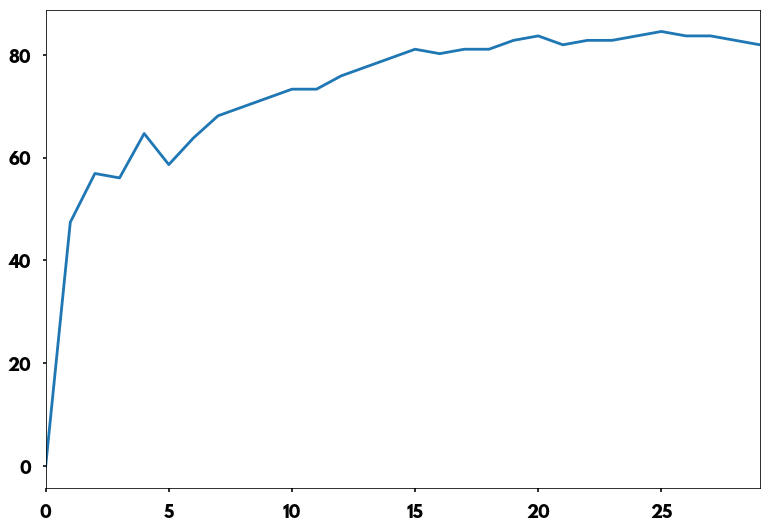

In [17]:
a = []
for i in range(1, YEARS+1):
    amt = 1000000
    percentile = scipy.stats.percentileofscore(t[i], amt)
    a.append(100 - percentile)
s = pandas.Series(data=a)
s.plot()

In [44]:
LENGTH = 20
df.apply(lambda x: scipy.stats.linregress(df.index[0:LENGTH], x[0:LENGTH])[0] / 1000000)[lambda x: x<0]

1901   -0.001022
1902   -0.009103
1903   -0.006016
1904   -0.001351
1905   -0.013731
1906   -0.021191
1907   -0.013726
1909   -0.012447
1910   -0.000264
1911   -0.000212
1962   -0.004523
1964   -0.009327
1965   -0.017306
1966   -0.020964
1967   -0.003728
1968   -0.012912
1969   -0.009830
dtype: float64

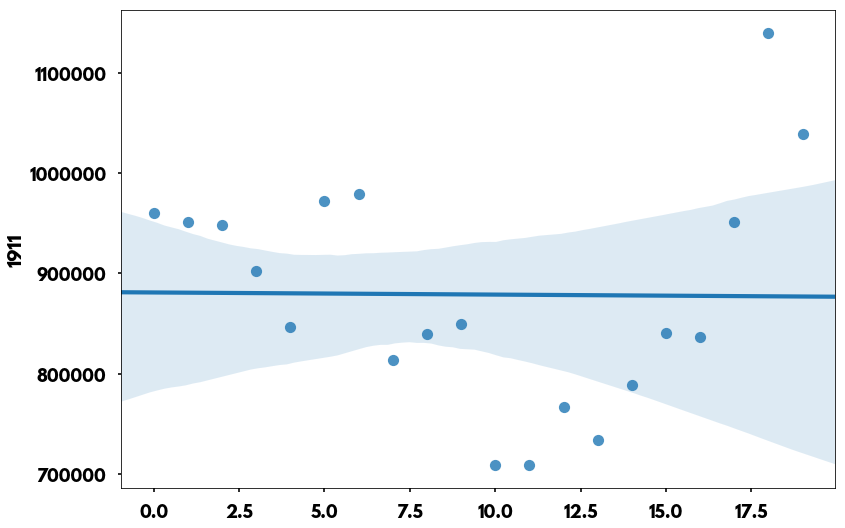

In [37]:
import numpy
plot.seaborn.regplot(numpy.arange(LENGTH), df[1911][0:LENGTH])